In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/Satria Data pt 2/Semifinal/'

Mounted at /content/drive


In [ ]:
!pip install fuzzywuzzy -q
!pip install python-Levenshtein -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.8 MB/s eta 0:00:00


In [ ]:
import time

In [ ]:
df = pd.read_pickle(folder_path + "/Dataset/dav/result_df_clean.pkl")
df

# Sample Dataset

In [ ]:
sample_df = df.sample(1000, random_state=42, ignore_index=True)
sample_df

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
0,rt ganjar b3rsama rakyat . [re arifin34533],RT Ganjar B3rsama Rakyat . https://t.co/Ffz02U...,2024-01-16 00:18:12+00:00,@mTyYrb+M4lsWZJ2FpR3Y8O1D8BVb/sbkfz+YCrWz+Zs=,rt,9,5009.0,8487.000000,49915.0,Indonesia,1.75,id,4,arifin34533
1,"kerennya orang2 benci dengan kampanye fitnah, ...",@zYpqY5sEy/3wCgQ/fz9iGZ2QIjC0xp+FxyXqhBR1yfk= ...,2024-01-14 10:41:05+00:00,@mZi8QOXCPWePYSqON/n+/bqh5N9gwaqd8CNj0ZLM1GU=,reply,0,30.0,14.000000,87.0,-,0.00,id,1,-
2,pemimpin berjiwa muda yang memanfaatkan medsos...,Pemimpin berjiwa muda yang memanfaatkan medsos...,2024-01-06 12:42:13+00:00,@9uYFPBhkIVsSQJ0rLYetNtvKqtcUcsH7MRSN9fDwkp8=,mention,0,2.0,0.000000,353.0,-,0.00,id,1,-
3,"bersama rakyat, prabowo menghadirkan harapan b...","Bersama rakyat, Prabowo menghadirkan harapan b...",2024-01-12 08:56:54+00:00,@zez6L1hh9CRNAkER5Te0FPQoVvHzZWvdQwjrwMKEfDY=,mention,0,28.0,11.333333,80.0,"Kabupaten Blitar,Kanigoro",0.00,id,3,-
4,ganjar membuat kita lebih percaya diri dalam b...,Ganjar membuat kita lebih percaya diri dalam b...,2024-01-05 07:57:12+00:00,@rpsIGIdBQLkbpXWGeq3/gj/qudYf7SEAK9zbRrWDAeY=,mention,0,54.0,25.000000,1185.0,"Jakarta Selatan, Indonesia",0.00,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,jangan ada lagi korban yang berjatuhan atas ke...,Jangan ada lagi korban yang berjatuhan atas ke...,2024-01-01 13:21:45+00:00,@qKsTcq3NA09NtjLc7sR/tFp764Jwa1ugK9ZUIlWcgpM=,mention,9,4094.0,4166.000000,24767.0,PLANET MARS,0.00,id,1,-
996,ganjar-mahfud dan ibu atikoh adalah kombinasi ...,Ganjar-Mahfud dan Ibu Atikoh adalah kombinasi ...,2024-01-16 11:45:14+00:00,@vQIv5qpFnfz1I3LjoMoEEiMYliBQsvt5WueJI1gjnwg=,mention,0,56.0,35.000000,1372.0,Padang Panjang,0.00,id,1,-
997,pak anies gamau lapor karena b aja ga kayak ba...,Pak anies gamau lapor karena b aja ga kayak ba...,2024-01-11 16:59:21+00:00,@krjd/KIKCt2HaPmdTxGvJIBcNs7979bg1RFHogayDXs=,mention,0,963.0,288.000000,28371.0,-,2.00,id,1,-
998,kalo pak anies gagal jangan pilih yang lain se...,@QLKQDwISppFd8IqxVSGHCJRZT1k0BWjdBNe7bPxzKLE= ...,2024-01-15 09:12:44+00:00,@K92GvHvgVLpw42hsJRiQR97ln8Qu/dCvs/QKntklNTQ=,reply,0,34.0,0.000000,71.0,-,0.00,id,1,-


In [ ]:
sample_df['created_at'] = sample_df['created_at'].astype(str)
print(sample_df.dtypes)

content              object
real_content         object
created_at           object
username             object
tcode                object
num_retweets          int64
frn_cnt             float64
flw_cnt             float64
sts_cnt             float64
loc                  object
lst_cnt             float64
lang                 object
appearance_count      int64
nama_re              object
dtype: object


In [ ]:
sample_df.columns

Index(['content', 'real_content', 'created_at', 'username', 'tcode',
       'num_retweets', 'frn_cnt', 'flw_cnt', 'sts_cnt', 'loc', 'lst_cnt',
       'lang', 'appearance_count', 'nama_re'],
      dtype='object')

In [ ]:
texts = sample_df['content'].tolist()

# Step 3: Constructing the Graph
G = nx.Graph()

# Add nodes with all other attributes
for idx, row in sample_df.iterrows():
  G.add_node(idx, **row.to_dict())

# Add edges based on similarity threshold
threshold = 80
for i in range(len(texts)):
  for j in range(i + 1, len(texts)):
    similarity = fuzz.ratio(texts[i], texts[j])
    if similarity > threshold:
        G.add_edge(i, j)

## Save dan load graph ke GEXF format untuk visualisasi Gephi

In [ ]:
nx.write_gexf(G, folder_path + 'Dataset_Part2/surya_belajar/sample_data_graph.gexf')

In [ ]:
print(f"Jumlah node: {G.number_of_nodes()}")
print(f"Jumlah edge: {G.number_of_edges()}")

Jumlah node: 1000
Jumlah edge: 498733


In [ ]:
G_saved = nx.read_gexf(folder_path + 'Dataset_Part2/surya_belajar/sample_data_graph.gexf')

In [ ]:
print(f"Jumlah node: {G_saved.number_of_nodes()}")
print(f"Jumlah edge: {G_saved.number_of_edges()}")

Jumlah node: 1000
Jumlah edge: 5


## Ekstraksi Fitur

### Fitur bawaaan network X

In [ ]:
import time

In [ ]:
start_time = time.time()

# Rekomendasi ChatGPT
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
harmonic_centrality = nx.harmonic_centrality(G)
katz_centrality = nx.katz_centrality(G)
load_centrality = nx.load_centrality(G)
subgraph_centrality = nx.subgraph_centrality(G)

# Selain rekomendasi chatgpt
subgraph_centrality_exp = nx.subgraph_centrality_exp(G)
percolation_centrality = nx.percolation_centrality(G)

end_time = time.time()
print(f"Lama proses 1000 data: {end_time - start_time}")

# voterank = nx.voterank(G)
# global_reaching_centrality = nx.global_reaching_centrality(G)
# dispersion = nx.dispersion(G)
# estrada_index = nx.estrada_index(G)
# edge_load_centrality = nx.edge_load_centrality(G)
# edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
# incremental_closeness_centrality = nx.incremental_closeness_centrality(G)
# current_flow_closeness_centrality = nx.current_flow_closeness_centrality(G)
# information_centrality = nx.information_centrality(G)
# current_flow_betweenness_centrality = nx.current_flow_betweenness_centrality(G)
# edge_current_flow_betweenness_centrality = nx.edge_current_flow_betweenness_centrality(G)
# approximate_current_flow_betweenness_centrality = nx.approximate_current_flow_betweenness_centrality(G)
# current_flow_betweenness_centrality_subset = nx.current_flow_betweenness_centrality_subset(G)
# edge_current_flow_betweenness_centrality_subset = nx.edge_current_flow_betweenness_centrality_subset(G)
# communicability_betweenness_centrality = nx.communicability_betweenness_centrality(G)
# group_betweenness_centrality = nx.group_betweenness_centrality(G)
# group_closeness_centrality = nx.group_closeness_centrality(G)
# group_degree_centrality = nx.group_degree_centrality(G)
# prominent_group = nx.prominent_group(G)
# local_reaching_centrality = nx.local_reaching_centrality(G)
# second_order_centrality = nx.second_order_centrality(G)
# trophic_levels = nx.trophic_levels(G)
# trophic_differences = nx.trophic_differences(G)
# trophic_incoherence_parameter = nx.trophic_incoherence_parameter(G)
# laplacian_centrality = nx.laplacian_centrality(G)

Lama proses 1000 data: 0.6413118839263916


<class 'networkx.utils.decorators.argmap'> compilation 194:3: FutureWarning: 

shortest_path will return an iterator that yields
(node, path) pairs instead of a dictionary when source
and target are unspecified beginning in version 3.5

To keep the current behavior, use:

	dict(nx.shortest_path(G))


Lama proses 1000 data: 2.3962526321411133


In [ ]:
num_neighbors_list = []
total_appearance_count_list = []

for node in G.nodes():
    neighbors = list(G.neighbors(node))
    num_neighbors_list.append(len(neighbors))

    total_appearance_counts = 0
    for neighbor in neighbors:
        total_appearance_counts += G.nodes[neighbor]['appearance_count']
    total_appearance_count_list.append(total_appearance_counts)

Node 232 memiliki tetangga dengan nilai appearance_count:
Tetangga 320: 6
Tetangga 973: 1


# Keseluruhan Data

In [ ]:
df['created_at'] = df['created_at'].astype(str)
print(df.dtypes)

content              object
real_content         object
created_at           object
username             object
tcode                object
num_retweets          int64
frn_cnt             float64
flw_cnt             float64
sts_cnt             float64
loc                  object
lst_cnt             float64
lang                 object
appearance_count      int64
nama_re              object
dtype: object


In [ ]:
df.columns

Index(['content', 'real_content', 'created_at', 'username', 'tcode',
       'num_retweets', 'frn_cnt', 'flw_cnt', 'sts_cnt', 'loc', 'lst_cnt',
       'lang', 'appearance_count', 'nama_re'],
      dtype='object')

In [ ]:
df = df[['content', 'appearance_count']]
df.shape

(2161199, 2)

In [ ]:
start = time.time()

texts = df['content'].tolist()

G = nx.Graph()
for idx, row in df.iterrows():
  G.add_node(idx, **row.to_dict())

print(f"Lama proses: {time.time() - start}")

Lama proses: 122.49482655525208


In [ ]:
from fuzzywuzzy import fuzz

start_idx = 0
increment = 10_000
max_index = len(texts)

start = time.time()

threshold = 80
for i in range(start_idx, start_idx + increment):
  for j in range(i + 1, len(texts)):
    similarity = fuzz.ratio(texts[i], texts[j])
    if similarity > threshold:
        G.add_edge(i, j)

print(f"Lama proses: {time.time() - start}")

## Save dan load graph ke GEXF format untuk visualisasi Gephi

In [ ]:
nx.write_gexf(G, folder_path + 'Dataset_Part2/surya/all_data_graph_0_10000.gexf')

In [ ]:
print(f"Jumlah node: {G.number_of_nodes()}")
print(f"Jumlah edge: {G.number_of_edges()}")

In [ ]:
G_saved = nx.read_gexf(folder_path + 'Dataset_Part2/surya/all_data_graph.gexf')

In [ ]:
print(f"Jumlah node: {G_saved.number_of_nodes()}")
print(f"Jumlah edge: {G_saved.number_of_edges()}")

Jumlah node: 1000
Jumlah edge: 5


## Ekstraksi Fitur

### Fitur bawaaan network X

In [ ]:
import time

In [ ]:
start_time = time.time()

# Rekomendasi ChatGPT
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
harmonic_centrality = nx.harmonic_centrality(G)
katz_centrality = nx.katz_centrality(G)
load_centrality = nx.load_centrality(G)
subgraph_centrality = nx.subgraph_centrality(G)

# Selain rekomendasi chatgpt
subgraph_centrality_exp = nx.subgraph_centrality_exp(G)
percolation_centrality = nx.percolation_centrality(G)

end_time = time.time()
print(f"Lama proses 1000 data: {end_time - start_time}")

# voterank = nx.voterank(G)
# global_reaching_centrality = nx.global_reaching_centrality(G)
# dispersion = nx.dispersion(G)
# estrada_index = nx.estrada_index(G)
# edge_load_centrality = nx.edge_load_centrality(G)
# edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
# incremental_closeness_centrality = nx.incremental_closeness_centrality(G)
# current_flow_closeness_centrality = nx.current_flow_closeness_centrality(G)
# information_centrality = nx.information_centrality(G)
# current_flow_betweenness_centrality = nx.current_flow_betweenness_centrality(G)
# edge_current_flow_betweenness_centrality = nx.edge_current_flow_betweenness_centrality(G)
# approximate_current_flow_betweenness_centrality = nx.approximate_current_flow_betweenness_centrality(G)
# current_flow_betweenness_centrality_subset = nx.current_flow_betweenness_centrality_subset(G)
# edge_current_flow_betweenness_centrality_subset = nx.edge_current_flow_betweenness_centrality_subset(G)
# communicability_betweenness_centrality = nx.communicability_betweenness_centrality(G)
# group_betweenness_centrality = nx.group_betweenness_centrality(G)
# group_closeness_centrality = nx.group_closeness_centrality(G)
# group_degree_centrality = nx.group_degree_centrality(G)
# prominent_group = nx.prominent_group(G)
# local_reaching_centrality = nx.local_reaching_centrality(G)
# second_order_centrality = nx.second_order_centrality(G)
# trophic_levels = nx.trophic_levels(G)
# trophic_differences = nx.trophic_differences(G)
# trophic_incoherence_parameter = nx.trophic_incoherence_parameter(G)
# laplacian_centrality = nx.laplacian_centrality(G)

Lama proses 1000 data: 0.6413118839263916


<class 'networkx.utils.decorators.argmap'> compilation 194:3: FutureWarning: 

shortest_path will return an iterator that yields
(node, path) pairs instead of a dictionary when source
and target are unspecified beginning in version 3.5

To keep the current behavior, use:

	dict(nx.shortest_path(G))


Lama proses 1000 data: 2.3962526321411133


### Fitur Jumlah Edges

In [ ]:
edges_from_nodes = {}

for node in G.nodes():
  edges_from_nodes[node] = list(G.edges(node))

num_edges = []
adjacency_appearance = []

count = 0
for node, edges in edges_from_nodes.items():
  num_edges.append(len(edges))
  if len(edges) != 0:
    # print(f"Node {node}: {edges}")
    count += 1
print(count)

### Fitur jumlah count appearance

33


In [ ]:
node = 232  # Contoh node yang ingin Anda analisis

# Ambil daftar tetangga dari node
neighbors = list(G.neighbors(node))

# Ambil nilai fitur 'count_appearance' dari setiap tetangga
appearance_counts = {}
for neighbor in neighbors:
    appearance_counts[neighbor] = G.nodes[neighbor]['appearance_count']

# Print hasil
print(f"Node {node} memiliki tetangga dengan nilai appearance_count:")
for neighbor, appearance_count in appearance_counts.items():
    print(f"Tetangga {neighbor}: {appearance_count}")

Node 232 memiliki tetangga dengan nilai appearance_count:
Tetangga 320: 6
Tetangga 973: 1


In [ ]:
# fitur jumlah edges


1000

In [ ]:
df['created_at'] = df['created_at'].astype(str)
print(df.dtypes)

content              object
real_content         object
created_at           object
username             object
tcode                object
num_retweets          int64
frn_cnt             float64
flw_cnt             float64
sts_cnt             float64
loc                  object
lst_cnt             float64
lang                 object
appearance_count      int64
nama_re              object
dtype: object


# Referensi

## Graf

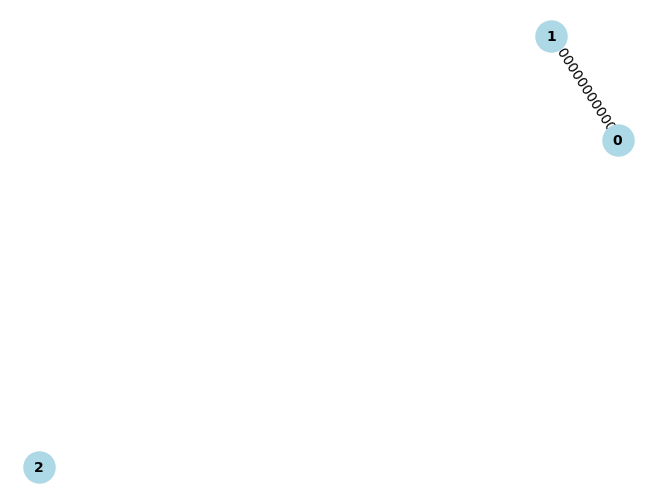

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

# Example dataframe
data = {'text': ["Tweet one", "Tweet one", "More tweets here"]}
df = pd.DataFrame(data)

# Step 1: Preprocessing (this is a simple example, you might want to do more preprocessing)
texts = df['text'].tolist()

# Step 2: Computing Similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)
cos_sim_matrix = cosine_similarity(tfidf_matrix)

# Step 3: Constructing the Graph
G = nx.Graph()

# Add nodes
for idx, text in enumerate(texts):
    G.add_node(idx, text=text)

# Add edges based on similarity threshold
threshold = 0.80
for i in range(len(texts)):
    for j in range(i + 1, len(texts)):
        if cos_sim_matrix[i, j] > threshold:
            G.add_edge(i, j, weight=cos_sim_matrix[i, j])

# Visualization (optional)
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


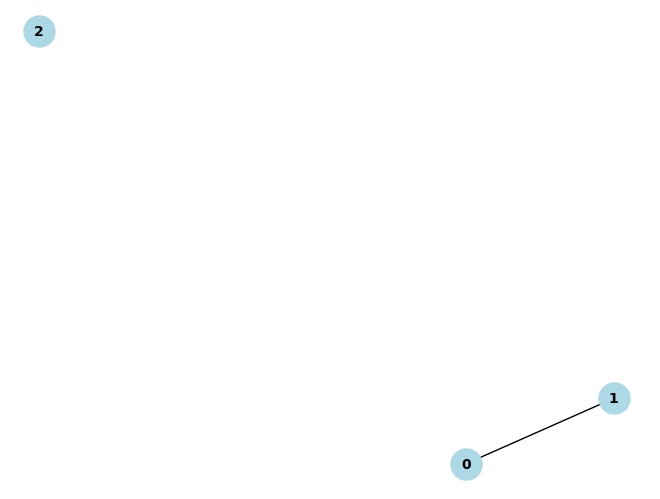

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

# Example dataframe
data = {'text': ["Tweet one", "Tweet one", "More tweets here"]}
df = pd.DataFrame(data)

# Step 1: Preprocessing (this is a simple example, you might want to do more preprocessing)
texts = df['text'].tolist()

# Step 2: Computing Similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)
cos_sim_matrix = cosine_similarity(tfidf_matrix)

# Step 3: Constructing the Graph
G = nx.Graph()

# Add nodes
for idx, text in enumerate(texts):
    G.add_node(idx, text=text)

# Add edges based on similarity threshold
threshold = 0.80
for i in range(len(texts)):
    for j in range(i + 1, len(texts)):
        if cos_sim_matrix[i, j] > threshold:
            G.add_edge(i, j)

# Visualization (optional)
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.show()


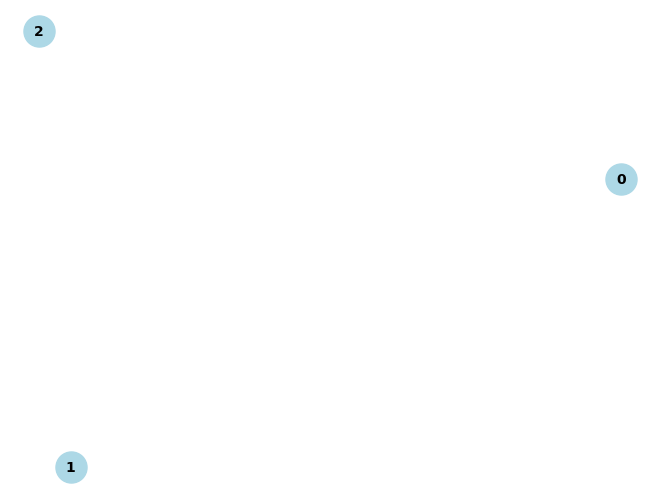

In [ ]:
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Example dataframe
data = {
    'content': ["Tweet one", "Another tweet", "More tweets here"],
    'real_content': ["Real tweet one", "Real another tweet", "Real more tweets"],
    'created_at': ["2024-01-16 00:18:12+00:00", "2024-01-17 13:45:01+00:00", "2024-01-18 08:30:45+00:00"],
    'username': ["user1", "user2", "user3"],
    'tcode': [123, 456, 789],
    'num_retweets': [10, 5, 2],
    'frn_cnt': [100.0, 150.0, 200.0],
    'flw_cnt': [1000.0, 1500.0, 2000.0],
    'sts_cnt': [50.0, 60.0, 70.0],
    'loc': ["loc1", "loc2", "loc3"],
    'lst_cnt': [5.0, 4.0, 3.0],
    'lang': ["en", "en", "en"],
    'appearance_count': [1, 2, 3],
    'nama_re': ["name1", "name2", "name3"]
}
df = pd.DataFrame(data)

# Convert created_at to datetime and then to string
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d %H:%M:%S')

# Step 1: Preprocessing (this is a simple example, you might want to do more preprocessing)
texts = df['content'].tolist()

# Step 2: Computing Similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)
cos_sim_matrix = cosine_similarity(tfidf_matrix)

# Step 3: Constructing the Graph
G = nx.Graph()

# Add nodes with all other attributes, ensuring correct data types
for idx, row in df.iterrows():
    row_dict = row.to_dict()
    G.add_node(idx, **row_dict)

# Add edges based on similarity threshold
threshold = 0.80
for i in range(len(texts)):
    for j in range(i + 1, len(texts)):
        if cos_sim_matrix[i, j] > threshold:
            G.add_edge(i, j)

# Write the graph to a GEXF file
folder_path = ''  # Replace with your folder path if needed
nx.write_gexf(G, folder_path + 'sample_data_graph.gexf')

# Load and visualize the graph (optional)
G_loaded = nx.read_gexf(folder_path + 'sample_data_graph.gexf')
pos = nx.spring_layout(G_loaded)
nx.draw(G_loaded, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.show()


## similarity

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.3 MB/s eta 0:00:00


In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Calculate similarity between two strings
string1 = "#prabowo #gibran"
string2 = "ada apa ini #prabowo #gibran"

ratio = fuzz.ratio(string1, string2)
partial_ratio = fuzz.partial_ratio(string1, string2)
token_sort_ratio = fuzz.token_sort_ratio(string1, string2)
token_set_ratio = fuzz.token_set_ratio(string1, string2)

print(f"Ratio: {ratio}")
print(f"Partial Ratio: {partial_ratio}")
print(f"Token Sort Ratio: {token_sort_ratio}")
print(f"Token Set Ratio: {token_set_ratio}")

Ratio: 73
Partial Ratio: 100
Token Sort Ratio: 70
Token Set Ratio: 100


In [ ]:
def jaccard_similarity(teks1, teks2):
  set1 = set(teks1.split())
  set2 = set(teks2.split())

  intersection = set1.intersection(set2)
  union = set1.union(set2)
  return len(intersection) / len(union)

string1 = "das #prabowo #gibran"
string2 = "ada apa ini #prabowo #gibran"

similarity = jaccard_similarity(string1, string2)
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 0.3333333333333333


In [ ]:
def dice_similarity(teks1, teks2):
  set1 = set(teks1.split())
  set2 = set(teks2.split())

  intersection = len(set1.intersection(set2))
  return 2 * intersection / (len(set1) + len(set2))

string1 = "#prabowo #gibran"
string2 = "ada apa ini #prabowo #gibran"

similarity = dice_similarity(string1, string2)
print(f"Dice Similarity: {similarity}")

Dice Similarity: 0.5714285714285714


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

string1 = "#prabowo #gibran"
string2 = "ada apa ini #prabowo #gibran"

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([string1, string2])

cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f"Cosine Similarity: {cos_sim[0][0]}")

Cosine Similarity: 0.5023287782256718
